# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, precision_score, log_loss
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

# Obtención Datos

In [ ]:
oTrainData = pd.read_csv("train.csv")
oTestData = pd.read_csv("test.csv")

# Analisis de datos

In [ ]:
import pandas as pd

# Contar los valores faltantes en cada columna
missing_values = oTrainData.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Describir las variables numéricas para identificar posibles valores atípicos
print(oTrainData.describe())


# Mapear 'female' a 1 y 'male' a 0 en la columna 'Sex'
oTrainData['Sex'] = oTrainData['Sex'].map({'female': 1, 'male': 0})

# Mostrar las primeras filas para confirmar el cambio
print(oTrainData.head())

NameError: name 'oTrainData' is not defined

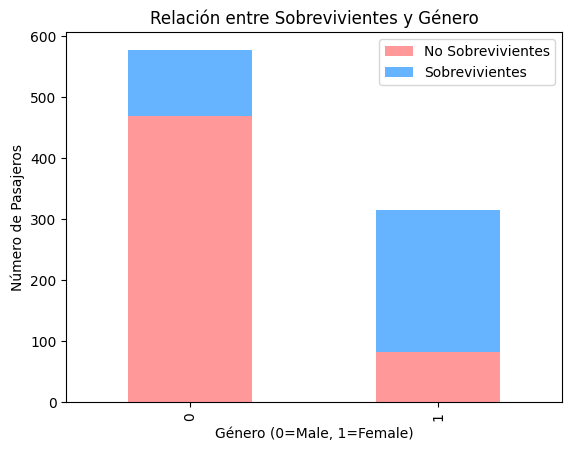

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
oTrainData = pd.read_csv('/content/train.csv')

# Mapear 'female' a 1 y 'male' a 0 en la columna 'Sex'
oTrainData['Sex'] = oTrainData['Sex'].map({'female': 1, 'male': 0})

# Rellenar los valores faltantes en la columna 'Age' con la edad media
mean_age = oTrainData['Age'].mean()
oTrainData['Age'].fillna(mean_age, inplace=True)

# Verificar que la columna 'Survived' exista en el DataFrame
if 'Survived' not in oTrainData.columns:
    raise ValueError("La columna 'Survived' no se encuentra en el DataFrame.")

# Agrupar por género y sobrevivencia para contar la cantidad de sobrevivientes y no sobrevivientes
survival_by_gender = oTrainData.groupby(['Sex', 'Survived']).size().unstack()

# Crear la gráfica de barras
survival_by_gender.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.xlabel('Género (0=Male, 1=Female)')
plt.ylabel('Número de Pasajeros')
plt.title('Relación entre Sobrevivientes y Género')
plt.legend(['No Sobrevivientes', 'Sobrevivientes'])
plt.show()

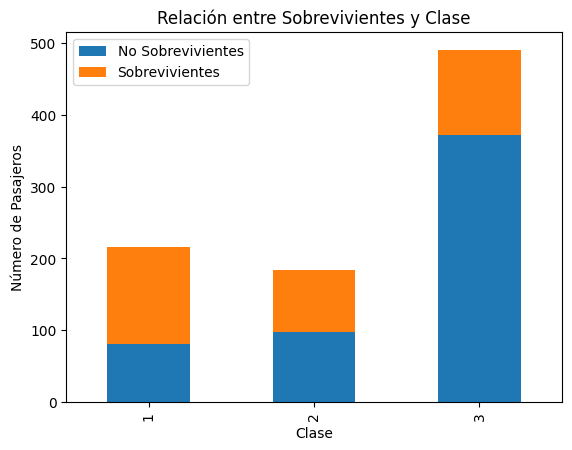

In [ ]:
import matplotlib.pyplot as plt
survival_by_class = oTrainData.groupby(['Pclass', 'Survived']).size().unstack()

# Crear la gráfica de barras
survival_by_class.plot(kind='bar', stacked=True)
plt.xlabel('Clase')
plt.ylabel('Número de Pasajeros')
plt.title('Relación entre Sobrevivientes y Clase')
plt.legend(['No Sobrevivientes', 'Sobrevivientes'])
plt.show()


Cantidad de personas que sobrevivieron, murieron y el total por clase social y género:
Survived      0   1  Total
Pclass Sex                
1      0     77  45    122
       1      3  91     94
2      0     91  17    108
       1      6  70     76
3      0    300  47    347
       1     72  72    144

Índice de supervivencia por clase social y género (redondeado):
Pclass  Sex
1       0      37
        1      97
2       0      16
        1      92
3       0      14
        1      50
dtype: int64


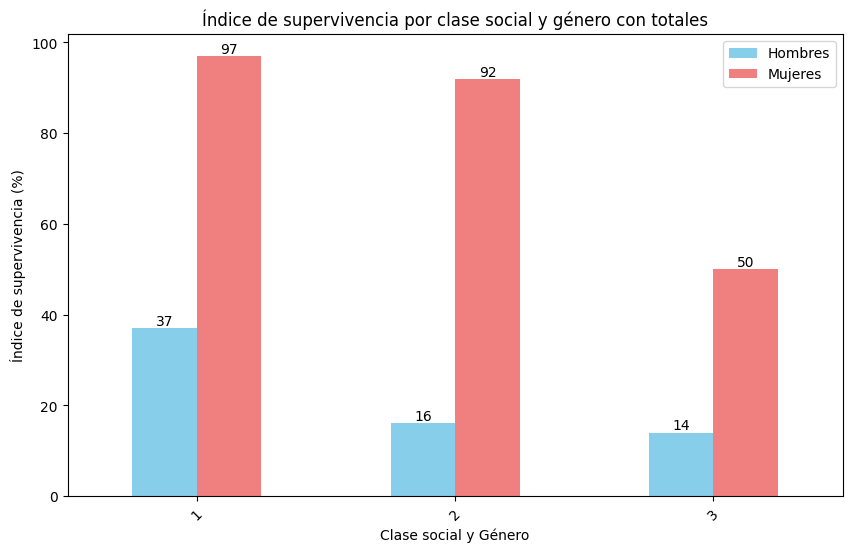

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

survival_by_class_gender = oTrainData.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()

# Calcular el total de personas en cada clase social y género
total_by_class_gender = survival_by_class_gender.sum(axis=1)

# Agregar el total al DataFrame survival_by_class_gender
survival_by_class_gender['Total'] = total_by_class_gender

# Mostrar la cantidad de personas que sobrevivieron, murieron y el total por clase social y género
print("Cantidad de personas que sobrevivieron, murieron y el total por clase social y género:")
print(survival_by_class_gender)

# Calcula el índice de supervivencia por clase social y género
survival_rate_by_class_gender = survival_by_class_gender[1] / survival_by_class_gender['Total']

# Redondear los índices de supervivencia a enteros (porcentaje)
survival_rate_by_class_gender_percent = (survival_rate_by_class_gender * 100).round().astype(int)

# Mostrar el índice de supervivencia por clase social y género en porcentaje
print("\nÍndice de supervivencia por clase social y género (redondeado):")
print(survival_rate_by_class_gender_percent)

# Graficar el índice de supervivencia por clase social y género
ax = survival_rate_by_class_gender_percent.unstack().plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(10, 6))

# Añadir las anotaciones con el índice de supervivencia redondeado
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Ajustar etiquetas y título
plt.xlabel('Clase social y Género')
plt.ylabel('Índice de supervivencia (%)')
plt.title('Índice de supervivencia por clase social y género con totales')
plt.xticks(rotation=45)
plt.legend(['Hombres', 'Mujeres'])

# Mostrar la gráfica
plt.show()


<ipython-input-13-af080d706e4a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = oTrainData.groupby(['AgeGroup', 'Survived']).size().unstack()


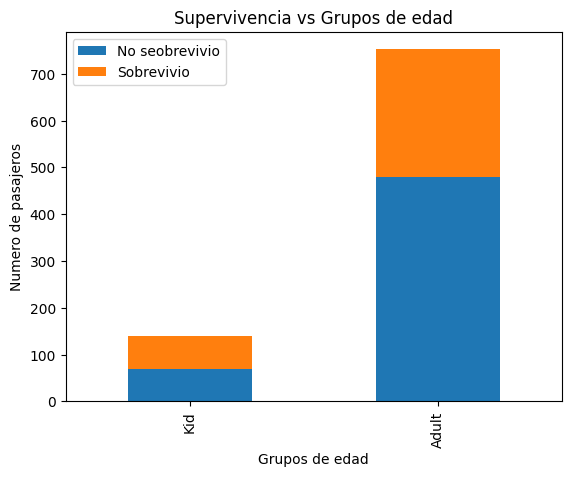

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Define las edades
oTrainData['AgeGroup'] = pd.cut(oTrainData['Age'], bins=[0, 18, 100], labels=['Kid', 'Adult'])

survival_by_age_group = oTrainData.groupby(['AgeGroup', 'Survived']).size().unstack()

survival_by_age_group.plot(kind='bar', stacked=True)
plt.xlabel('Grupos de edad')
plt.ylabel('Numero de pasajeros')
plt.title('Supervivencia vs Grupos de edad')
plt.legend(['No seobrevivio', 'Sobrevivio'])
plt.show()


Cantidad total, fallecidos y sobrevivientes por grupo de edad (desglosado por género):
          Total  Hombres Fallecidos  Hombres Sobrevivientes  Mujeres Fallecidas  Mujeres Sobrevivientes
AgeGroup                                                                                               
0-4          44                   8                      15                   5                      16
5-9          20                   6                       4                   7                       3
10-14        19                   5                       2                   3                       9
15-19        96                  54                       8                   9                      25
20-24       122                  69                       8                  11                      34
25-29       108                  57                      15                   9                      27
30-34        88                  43                      15                   4  

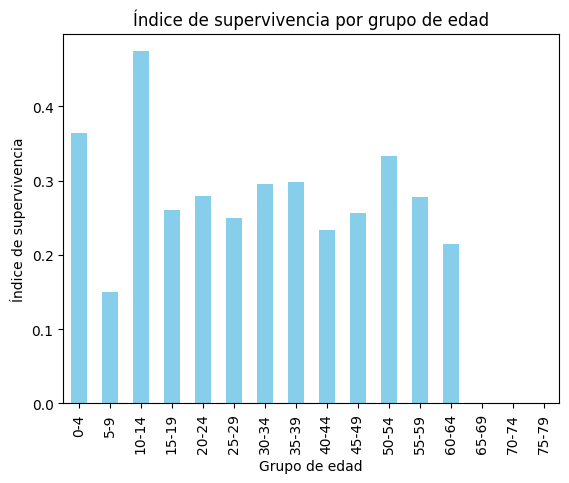

In [ ]:
import pandas as pd

oTrainData = pd.read_csv('/content/train.csv')

# Limpiar datos: eliminar filas con edad faltante
oCleanData = oTrainData[~oTrainData['Age'].isnull()].copy()
oCleanData.index = range(len(oCleanData))

# Definir grupos de edad
oCleanData.loc[:, 'AgeGroup'] = pd.cut(oCleanData['Age'], bins=range(0, 101, 5), labels=[f"{i}-{i+4}" for i in range(0, 96, 5)])

# Mapear 'female' a 1 y 'male' a 0 en la columna 'Sex'
oCleanData.loc[:, 'Sex'] = oCleanData['Sex'].map({'female': 1, 'male': 0})

# Agrupar por grupo de edad, género y supervivencia
survival_by_age_gender = oCleanData.groupby(['AgeGroup', 'Sex', 'Survived'], observed=True).size().unstack(level=[1, 2], fill_value=0)
# Calcular el total de personas por grupo de edad
total_by_age_group = survival_by_age_gender.sum(axis=1)

# Crear una tabla que combine total, fallecidos y sobrevivientes desglosado por género
summary_by_age_gender = pd.DataFrame({
    'Total': total_by_age_group,
    'Hombres Fallecidos': survival_by_age_gender[(0, 0)],
    'Hombres Sobrevivientes': survival_by_age_gender[(0, 1)],
    'Mujeres Fallecidas': survival_by_age_gender[(1, 0)],
    'Mujeres Sobrevivientes': survival_by_age_gender[(1, 1)]
})

# Mostrar la tabla con el resumen
print("Cantidad total, fallecidos y sobrevivientes por grupo de edad (desglosado por género):")
print(summary_by_age_gender.to_string())

# Calcular el índice de supervivencia por grupo de edad
survival_rate_by_age_group = survival_by_age_gender[(1, 1)] / total_by_age_group

# Mostrar el índice de supervivencia por grupo de edad
print("\nÍndice de supervivencia por grupo de edad:")
print(survival_rate_by_age_group)

# Graficar el índice de supervivencia por grupo de edad
survival_rate_by_age_group.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo de edad')
plt.ylabel('Índice de supervivencia')
plt.title('Índice de supervivencia por grupo de edad')
plt.show()


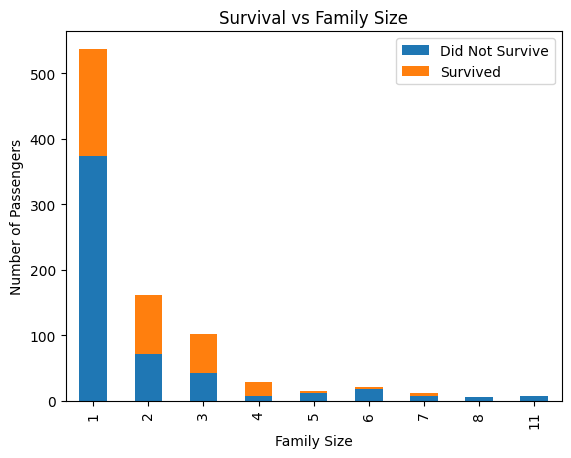

In [ ]:
import matplotlib.pyplot as plt
# Create a new column for family size
oTrainData['FamilySize'] = oTrainData['SibSp'] + oTrainData['Parch'] + 1

# Group by family size and survival
survival_by_family_size = oTrainData.groupby(['FamilySize', 'Survived']).size().unstack()

# Plot bar chart
survival_by_family_size.plot(kind='bar', stacked=True)
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.title('Survival vs Family Size')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

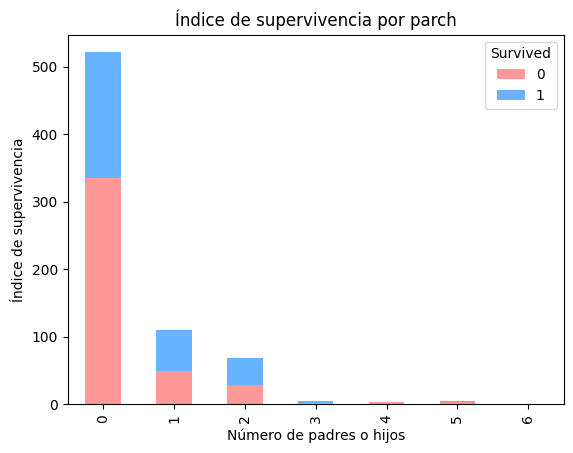

In [ ]:
# Supervivencia vs Grupos de edad
survival_by_parch = oCleanData.groupby(['Parch', 'Survived']).size().unstack()

# Mostrar el índice de supervivencia por grupo de edad
total_by_parch = survival_by_parch.sum(axis=1)
survival_by_parch_index = survival_by_parch.div(total_by_parch, axis=0) * 100

# Graficar el índice de supervivencia por grupo de edad
survival_by_parch.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.xlabel('Número de padres o hijos')
plt.ylabel('Índice de supervivencia')
plt.title('Índice de supervivencia por parch')
plt.show()

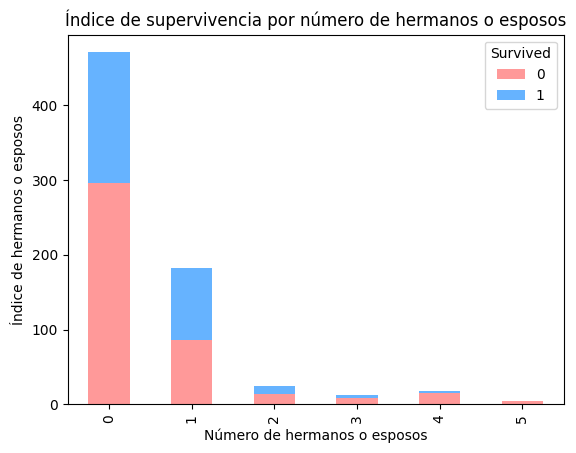

In [ ]:
# Supervivencia vs Grupos de edad
survival_by_sibsp = oCleanData.groupby(['SibSp', 'Survived']).size().unstack()

# Mostrar el índice de supervivencia por grupo de edad
total_by_sibsp = survival_by_sibsp.sum(axis=1)
survival_by_sibsp_index = survival_by_sibsp.div(total_by_parch, axis=0) * 100

# Graficar el índice de supervivencia por grupo de edad
survival_by_sibsp.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.xlabel('Número de hermanos o esposos')
plt.ylabel('Índice de hermanos o esposos')
plt.title('Índice de supervivencia por número de hermanos o esposos')
plt.show()


<ipython-input-18-d2412e5a75d6>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_counts = oTrainData.groupby(['AgeClass', 'Pclass'])['PassengerId'].count().unstack()


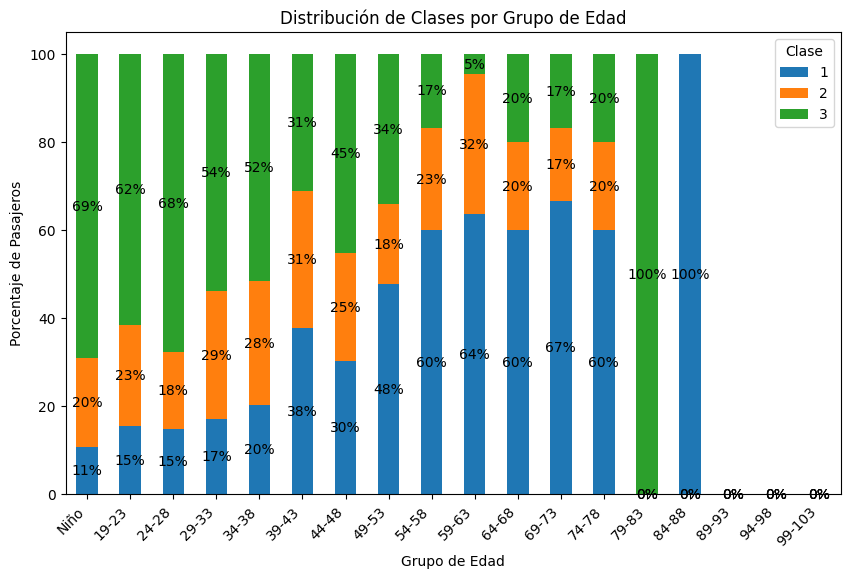

In [ ]:
bins = [0, 18] + list(range(19, 101, 5))

# Create labels for each age group
labels = ['Niño'] + [f'{i}-{i+4}' for i in range(19, 100, 5)]

# Categorize the ages into the defined bins
oTrainData['AgeClass'] = pd.cut(oTrainData['Age'], bins=bins, labels=labels, right=False)

# Calculate the counts and percentages
age_class_counts = oTrainData.groupby(['AgeClass', 'Pclass'])['PassengerId'].count().unstack()
age_class_percentages = age_class_counts.div(age_class_counts.sum(axis=1), axis=0) * 100

# Plot the data
ax = age_class_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f%%')

# Configure the labels and title
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje de Pasajeros')
plt.title('Distribución de Clases por Grupo de Edad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clase', loc='upper right')

# Show the plot
plt.show()

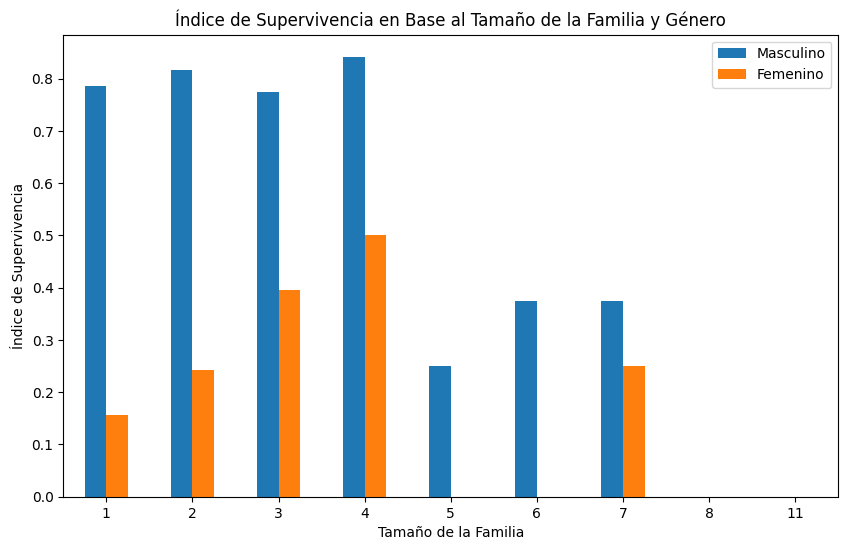

In [ ]:
oTrainData['FamilySize'] = oTrainData['SibSp'] + oTrainData['Parch'] + 1

survival_by_family_gender = oTrainData.groupby(['FamilySize', 'Sex', 'Survived']).size().unstack(fill_value=0)


total_by_family_gender = survival_by_family_gender.sum(axis=1)

survival_rate_by_family_gender = survival_by_family_gender[1] / total_by_family_gender

survival_rate_by_family_gender.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tamaño de la Familia')
plt.ylabel('Índice de Supervivencia')
plt.title('Índice de Supervivencia en Base al Tamaño de la Familia y Género')
plt.xticks(rotation=0)
plt.legend(['Masculino', 'Femenino'])
plt.show()

<ipython-input-20-d8834f234bc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oTrainData_adults['FamilySize'] = oTrainData_adults['SibSp'] + oTrainData_adults['Parch'] + 1


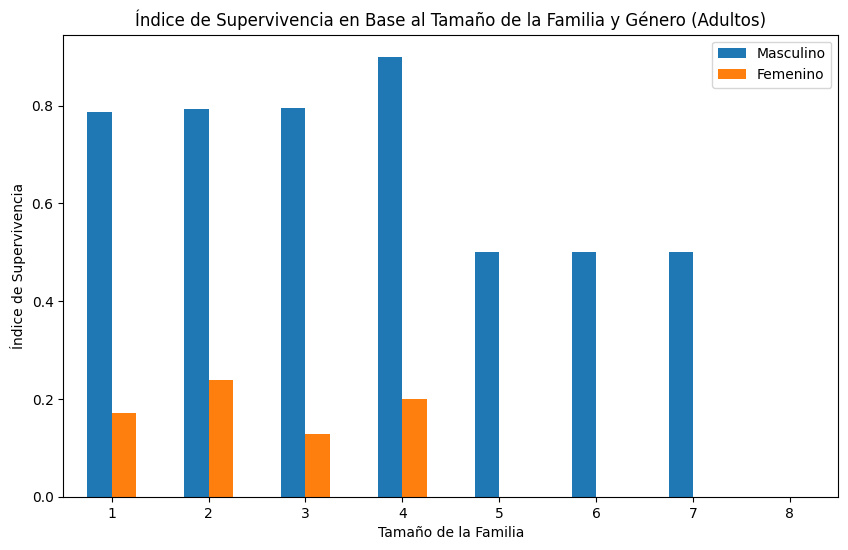

In [ ]:
oTrainData_adults = oTrainData[oTrainData['Age'] >= 18]

oTrainData_adults['FamilySize'] = oTrainData_adults['SibSp'] + oTrainData_adults['Parch'] + 1

survival_by_family_gender = oTrainData_adults.groupby(['FamilySize', 'Sex', 'Survived']).size().unstack(fill_value=0)
total_by_family_gender = survival_by_family_gender.sum(axis=1)
survival_rate_by_family_gender = survival_by_family_gender[1] / total_by_family_gender

survival_rate_by_family_gender.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tamaño de la Familia')
plt.ylabel('Índice de Supervivencia')
plt.title('Índice de Supervivencia en Base al Tamaño de la Familia y Género (Adultos)')
plt.xticks(rotation=0)
plt.legend(['Masculino', 'Femenino'])
plt.show()

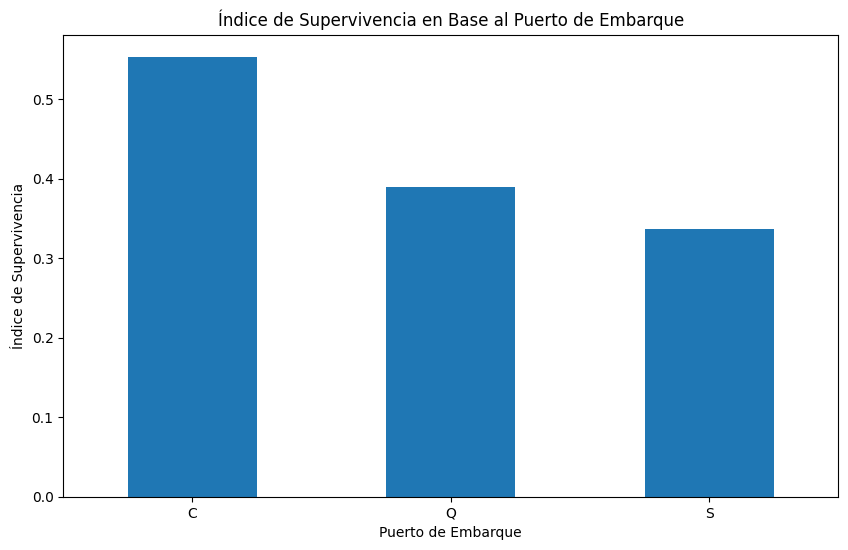

In [ ]:
import matplotlib.pyplot as plt
# supervivencia en base al puerto de embarque
survival_by_embarked = oTrainData.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
total_by_embarked = survival_by_embarked.sum(axis=1)
survival_rate_by_embarked = survival_by_embarked[1] / total_by_embarked

survival_rate_by_embarked.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Puerto de Embarque')
plt.ylabel('Índice de Supervivencia')
plt.title('Índice de Supervivencia en Base al Puerto de Embarque')
plt.xticks(rotation=0)
plt.show()



Índice de supervivencia por puerto de embarque y género:
Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
dtype: float64


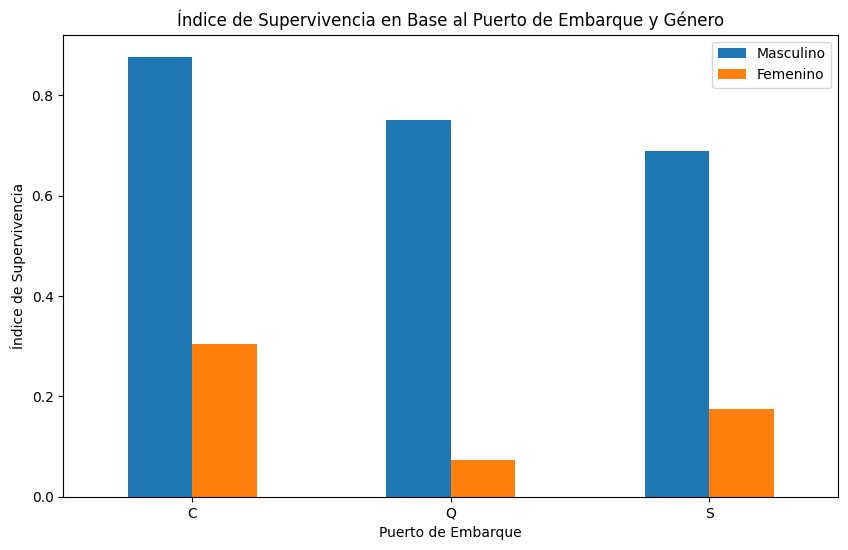

In [ ]:
import matplotlib.pyplot as plt
# Agrupar por puerto de embarque, género y supervivencia
survival_by_embarked_gender = oTrainData.groupby(['Embarked', 'Sex', 'Survived']).size().unstack(fill_value=0)

# Calcular el total de personas por puerto de embarque y género
total_by_embarked_gender = survival_by_embarked_gender.sum(axis=1)

# Calcular el índice de supervivencia por puerto de embarque y género
survival_rate_by_embarked_gender = survival_by_embarked_gender[1] / total_by_embarked_gender

# Mostrar el índice de supervivencia por puerto de embarque y género
print("\nÍndice de supervivencia por puerto de embarque y género:")
print(survival_rate_by_embarked_gender)

# Graficar el índice de supervivencia por puerto de embarque y género
survival_rate_by_embarked_gender.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Puerto de Embarque')
plt.ylabel('Índice de Supervivencia')
plt.title('Índice de Supervivencia en Base al Puerto de Embarque y Género')
plt.xticks(rotation=0)
plt.legend(['Masculino', 'Femenino'])
plt.show()


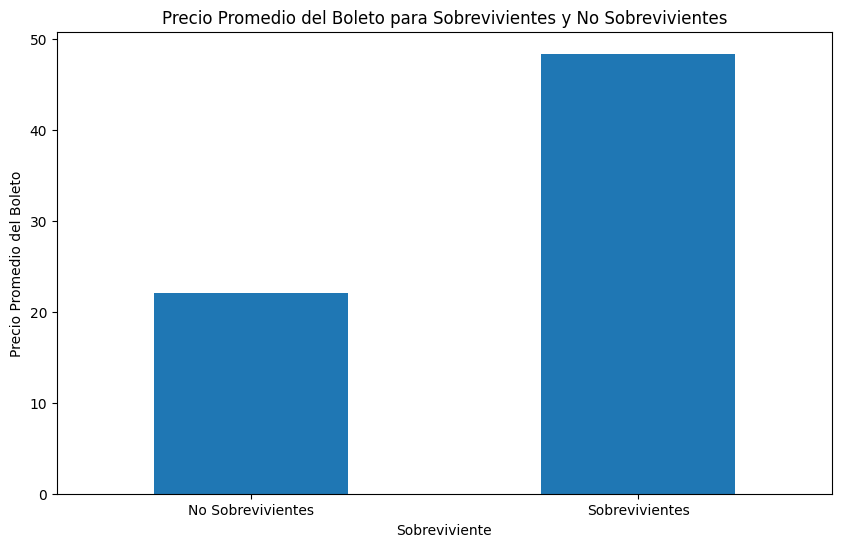

In [ ]:
import matplotlib.pyplot as plt

# supervivencia en base al precio del boleto
survival_by_fare = oTrainData.groupby(['Survived'])['Fare'].mean()

survival_by_fare.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sobreviviente')
plt.ylabel('Precio Promedio del Boleto')
plt.title('Precio Promedio del Boleto para Sobrevivientes y No Sobrevivientes')
plt.xticks([0, 1], ['No Sobrevivientes', 'Sobrevivientes'], rotation=0)
plt.show()

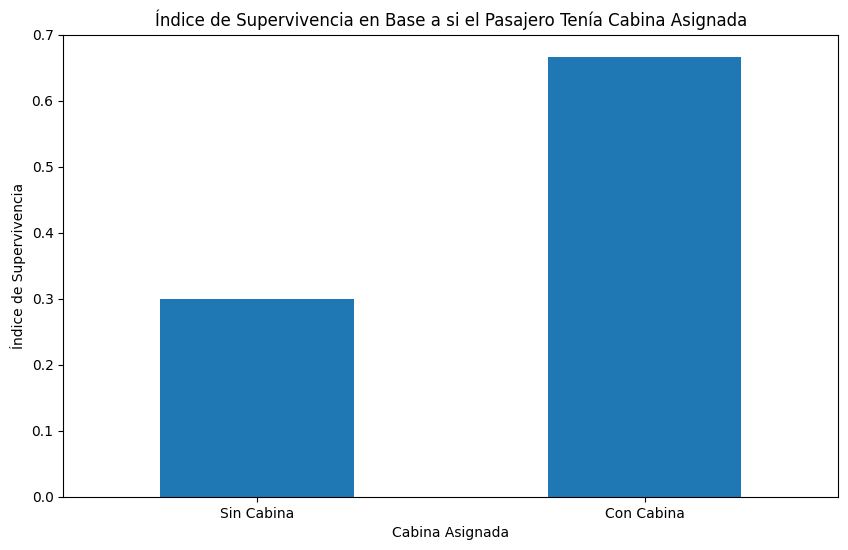

In [ ]:
import matplotlib.pyplot as plt

# supervivencia en base a si el pasajero tenía cabina asignada
oTrainData['HasCabin'] = oTrainData['Cabin'].notnull().astype(int)
survival_by_cabin = oTrainData.groupby(['HasCabin', 'Survived']).size().unstack(fill_value=0)
total_by_cabin = survival_by_cabin.sum(axis=1)
survival_rate_by_cabin = survival_by_cabin[1] / total_by_cabin

survival_rate_by_cabin.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cabina Asignada')
plt.ylabel('Índice de Supervivencia')
plt.title('Índice de Supervivencia en Base a si el Pasajero Tenía Cabina Asignada')
plt.xticks([0, 1], ['Sin Cabina', 'Con Cabina'], rotation=0)
plt.show()

# Limpieza de Datos

In [ ]:
# 1 niños, 2 adultos, 3 adultos mayores
def label_age(age):
  if 0 <= age <= 10: return 1
  elif 11 <= age <= 20: return 2
  elif 21 <= age <= 35: return 3
  elif 36 <= age <= 50: return 4
  elif 51 <= age <= 65: return 5
  elif 66 <= age <= 80: return 6
  else: return 0

def clean_data(df, age_neighbors = False, nbs_number = 4, group_age = True, scale_age= False):
  scaler = StandardScaler()
  hot_encoder = OneHotEncoder()

  data_copy = df.copy().drop(columns = ["PassengerId", "Name", "Fare", "Cabin", "Ticket"])
  data_copy["Sex"] = data_copy["Sex"].map({"male": 0, "female": 1})
  data_copy["Embarked"].fillna(data_copy["Embarked"].mode()[0], inplace = True)

  encoded_embarked = hot_encoder.fit_transform(data_copy[["Embarked"]]).toarray()
  encoded_embarked = pd.DataFrame(encoded_embarked, columns = ["C", "Q", "S"])
  data_copy = pd.concat([data_copy, encoded_embarked], axis = 1)
  data_copy.drop(columns = ["Embarked"], inplace = True)

  #data_copy["Fare"].fillna(data_copy["Fare"].median(), inplace = True)
  #data_copy[["Fare"]] = scaler.fit_transform(data_copy[["Fare"]])

  if age_neighbors:
    data_for_inputation = data_copy[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]]
    imputer = KNNImputer(n_neighbors = nbs_number)
    imputed_data = imputer.fit_transform(data_for_inputation)
    imputed_df = pd.DataFrame(imputed_data, columns = data_for_inputation.columns)
    data_copy["Age"] = imputed_df["Age"]

  else:
    data_copy["Age"].fillna(data_copy["Age"].median(), inplace = True)

  if group_age:
    data_copy["Age"] = data_copy["Age"].apply(label_age)

  if scale_age:
    data_copy[["Age"]] = scaler.fit_transform(data_copy[["Age"]])

  return data_copy

def oversample(x, y):
  ros = RandomOverSampler()
  x, y = ros.fit_resample(x, y)
  return x, y

In [ ]:
#oTrainData = pd.read_csv("train.csv")
#oTestData = pd.read_csv("test.csv")


oCleanTrainData = clean_data(oTrainData, age_neighbors=True, group_age=False, scale_age=True)
#oCleanTrainData.head()
oCleanTrainData, oCleanTestData = train_test_split(oCleanTrainData, test_size=0.2)


oCleanTrainData, oCleanValidationData = train_test_split(oCleanTrainData, test_size=0.5)


print("Train Length: ", len(oCleanTrainData))
print("Validation Length: ",len(oCleanValidationData))
print("Test Length: ",len(oCleanTestData))

Train Length:  356
Validation Length:  356
Test Length:  179


In [ ]:
oCleanTrainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
721,0,3,0,-0.891171,1,0,0.0,0.0,1.0
354,0,3,0,-0.386324,0,0,1.0,0.0,0.0
135,0,2,0,-0.450577,0,0,1.0,0.0,0.0
694,0,1,0,2.266420,0,0,0.0,0.0,1.0
466,0,2,0,0.650908,0,0,0.0,0.0,1.0


# Modelo Clasificacion

In [ ]:
oFScore = []
train_sizes = np.arange(0.2, 1.0, 0.1)  # 40% a 90%, incrementando de 10 en 10

best_results = []
best_model = None
best_solver = None
oSolverList = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag","saga"]
results = []

for sSolver in oSolverList:
  for train_size in train_sizes:

    best_seed, best_score, best_precision = None, float("-inf"), float("-inf")
    best_score = 0

    seeds = [[np.random.randint(0, 2**32 - 1), np.random.randint(0, 2**32 - 1)] for _ in range(100)]
    for seed in seeds:

      #Se asigna el tamaño del Sample con el que se va a entrenar
      iSampleSize = int( len(oCleanTrainData) * train_size )

      #Se separa el subset de entrenamiento por el tamaño que se asigno arriba
      oTrainSubset = oCleanTrainData.sample(n=iSampleSize)
      x, y = oversample(oTrainSubset[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]], oTrainSubset["Survived"])

      #se entrena el modeloen base a los hiperparametros de Semilla y Solver
      oModelTemp = LogisticRegression(random_state=seed[1], solver=sSolver, max_iter=10000)
      #oModelTemp.fit(oTrainSubset[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]], oTrainSubset["Survived"])
      oModelTemp.fit(x,y)

      #Se generan las predicciones en base a los datos de Entrenamiento con nuestro modelo ya entrenado
      oTrainingPredict = oModelTemp.predict(oTrainSubset[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]])
      fTrainingFScore = f1_score( oTrainSubset["Survived"], oTrainingPredict)
      fTrainingLogLoss = log_loss( oTrainSubset["Survived"], oTrainingPredict)

      #Se generan las predicciones en base a los datos de Validacion con modelo ya entrenado
      oValidationPredict = oModelTemp.predict(oCleanValidationData[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]])
      fValidationFScore = f1_score(oCleanValidationData["Survived"], oValidationPredict)
      fValidationLogLoss = log_loss(oCleanValidationData["Survived"], oValidationPredict)

      #Por si acaso guardamos el error cuadratico
      oFScore.append(fValidationFScore)

      #Si el error cuadratico, de las predicciones de Validacion, es menor al anterior se guarda como el mejor modelo
      if fValidationFScore > best_score:
        best_score = fValidationFScore
        best_seed = seed
        best_precision = precision_score(oCleanValidationData["Survived"], oValidationPredict) # Guarda Precicion
        best_model = oModelTemp  # Guardar el mejor modelo entrenado
        best_solver = sSolver # Guarda con que Solver tuvo el mejor resultado
        best_results.append({
            "train_size": train_size,
            "best_seed_split": best_seed[0],
            "best_seed_train": best_seed[1],
            "best_precision": best_precision,
            "best_score": best_score,
            "best_solver": best_solver,
        })

      #Guardamos todos los resultados
      results.append((train_size, sSolver, fTrainingFScore, fTrainingLogLoss ,fValidationFScore, fValidationLogLoss))

  # Convertir resultados a DataFrame y exportar a CSV
logistic_data = pd.DataFrame(results, columns = ["train_size", "solver", "fTrainingFScore", "fTrainingLogLoss", "fValidationFScore", "fValidationLogLoss"])
best_results_df = pd.DataFrame(best_results)
best_results_df.to_csv("best_tree_results.csv", index=False)


# Mostrar los mejores resultados
print(best_results_df)

     train_size  best_seed_split  best_seed_train  best_precision  best_score  \
0           0.2       1723463638        177801891        0.703947    0.735395   
1           0.2       2083933156       3076909759        0.746479    0.754448   
2           0.2       3687173766        371767915        0.773050    0.778571   
3           0.2       2403670650       1809800909        0.778571    0.781362   
4           0.3       4179813320        640835607        0.762238    0.773050   
..          ...              ...              ...             ...         ...   
227         0.8       2191697976       2595254971        0.750000    0.763251   
228         0.8       2417631648        924193493        0.758621    0.774648   
229         0.8        553152310         20805895        0.767606    0.775801   
230         0.9       2262574612       4044196783        0.756944    0.770318   
231         0.9       3635354591       3505707082        0.758621    0.774648   

    best_solver  
0        

F1 Score:   0.7272727272727272
Log Loss:   7.249002916247025
Precision:  0.7619047619047619


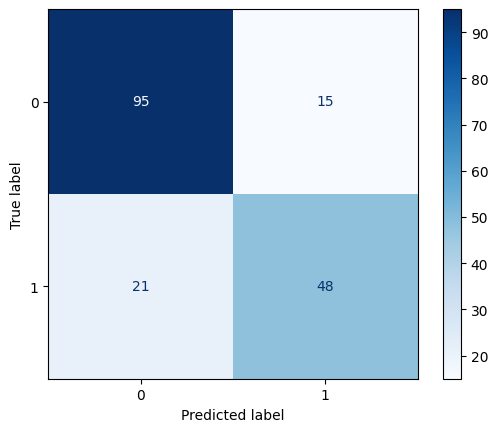

In [ ]:
best_index = best_results_df["best_score"].idxmax()
best_model = best_model  # Utiliza el modelo del mejor F1 score global
test_predicciones = best_model.predict(oCleanTestData[["Age", "Pclass", "Sex", "SibSp", "Parch",  "C", "Q", "S"]])

fTestFScore = f1_score(oCleanTestData["Survived"], test_predicciones)
print("F1 Score:  ", fTestFScore)
print("Log Loss:  ", log_loss(oCleanTestData["Survived"], test_predicciones))
print("Precision: ", precision_score(oCleanTestData["Survived"], test_predicciones))

cm = confusion_matrix(oCleanTestData["Survived"], test_predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_model.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.show()

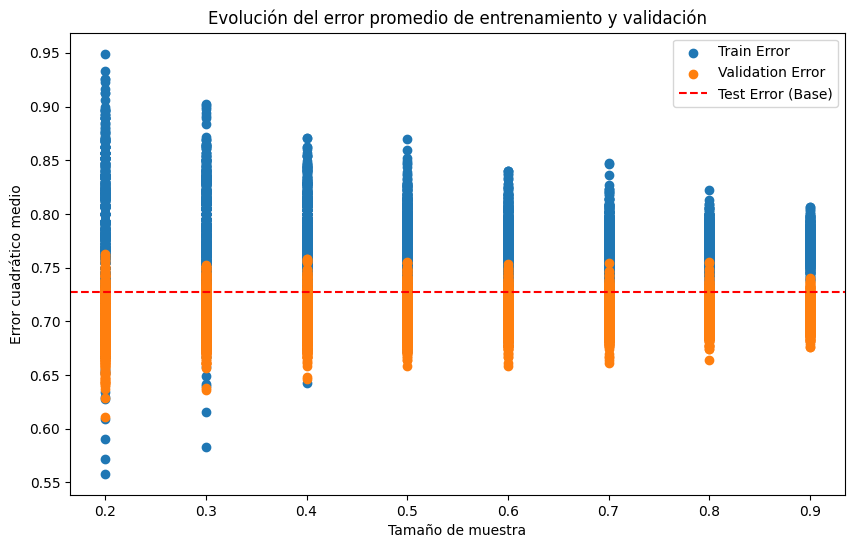

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(logistic_data["train_size"] , logistic_data["fTrainingFScore"], label='Train Error')
plt.scatter(logistic_data["train_size"]  , logistic_data["fValidationFScore"], label='Validation Error')
plt.axhline(y=fTestFScore, color='red', linestyle='--', label='Test Error (Base)')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del error promedio de entrenamiento y validación')
plt.legend()
plt.show()

In [ ]:
logistic_data = logistic_data.sort_values(by = "fValidationFScore", ascending = True)
logistic_data.head()

,train_size,solver,fTrainingFScore,fTrainingLogLoss,fValidationFScore,fValidationLogLoss
1694,0.2,newton-cg,0.777778,6.091885,0.611321,10.428360
1662,0.2,newton-cg,0.727273,6.091885,0.629032,9.314652
158,0.3,lbfgs,0.729730,6.800689,0.635659,9.517144
3244,0.2,sag,0.763636,6.599542,0.636735,9.010913
3357,0.3,sag,0.753623,5.780586,0.637795,9.314652


In [ ]:
oTestData = pd.read_csv('/content/test.csv')

oSubmissionTestData = clean_data(oTestData)
best_index = best_results_df["best_score"].idxmax()
best_model = best_model  # Utiliza el modelo del mejor F1 score global
test_predicciones = best_model.predict(oSubmissionTestData[["Age", "Pclass", "Sex", "SibSp", "Parch",  "C", "Q", "S"]])

# Crear el archivo de salida con las predicciones
submit_data = pd.DataFrame(oTestData, columns=["PassengerId"])
submit_data["Survived"] = test_predicciones
submit_data.to_csv("prediction.csv", index=False)
print("Predicciones guardadas en 'prediction.csv'")


Predicciones guardadas en 'prediction.csv'


# Modelo Redes Neuronales

In [ ]:
def train_nn_model(train_x, train_y, layers, alpha, solver, max_iter, learning_rate_value, activation_value):
  nn = MLPClassifier(activation=activation_value, hidden_layer_sizes=layers, max_iter=max_iter,
                     solver=solver, alpha=alpha, learning_rate="adaptive", learning_rate_init=learning_rate_value, verbose = False)
  nn.fit(train_x, train_y)
  return nn



In [ ]:
layers = [(i, j, k, 1) for i in range(2, 7) for j in range(2, 5) for k in range(2, 4)]
train_sizes = np.arange(0.2, 1.0, 0.1)  # 40% a 90%, incrementando de 10 en 10
solvers = ["adam", "sgd", "lbfgs"]

oNNScore = []
results = []
best_results = []
best_nn_model = None
best_score, best_log_loss = float("-inf"), float("inf")
MAX_ITER = 2000

for layer in layers:
  for train_size in train_sizes:
    for solver in solvers:
        train_x, _, train_y, _ = train_test_split(
          oCleanTrainData.drop(columns=["Survived"]), oCleanTrainData["Survived"], train_size= train_size)
        train_x, train_y = oversample(train_x, train_y)

        nn_model = MLPClassifier(hidden_layer_sizes=layer, max_iter=MAX_ITER, solver=solver, verbose = False, activation = "relu")
        nn_model.fit(train_x, train_y)

        # Predicciones de entrenamiento
        oTrainPredict = nn_model.predict(train_x)
        fTrainingFScore = f1_score(train_y, oTrainPredict)
        fTrainingLogLoss = log_loss(train_y, oTrainPredict)

        # Predicciones de validacion
        oValidationPredict = nn_model.predict(oCleanValidationData.drop(columns = ['Survived']))
        fValidationFScore = f1_score(oCleanValidationData['Survived'], oValidationPredict)
        fValidationLogLoss = log_loss(oCleanValidationData['Survived'], oValidationPredict)


        oNNScore.append(fValidationFScore)

        if fValidationFScore > best_score:
            best_score = fValidationFScore
            best_nn_model = nn_model
            best_precision = precision_score(oCleanValidationData['Survived'], oValidationPredict)
            best_results.append({
                "layers": layer,
                "train_size": train_size,
                "solver": solver,
                "precision": best_precision,
                "f1_score": best_score,
                "log_loss": fValidationLogLoss,
            })

        results.append((layer, train_size, solver , fTrainingFScore, fTrainingLogLoss, fValidationFScore, fValidationLogLoss))

nn_model_data = pd.DataFrame(results, columns = ["layers", "train_size", "solver", "fTrainingFScore", "fTrainingLogLoss", "fValidationFScore", "fValidationLogLoss"])
nn_best_results_data = pd.DataFrame(best_results)
nn_best_results_data.to_csv("nn_best_results.csv", index=False)
print(nn_best_results_data)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/pyth

          layers  train_size solver  precision  f1_score   log_loss
0   (2, 2, 2, 1)         0.2   adam   0.000000  0.000000  14.478209
1   (2, 2, 2, 1)         0.2    sgd   0.401685  0.573146  21.565444
2   (2, 2, 2, 1)         0.3  lbfgs   0.793103  0.710425   7.593466
3   (2, 2, 2, 1)         0.4   adam   0.726619  0.716312   8.099697
4   (2, 2, 2, 1)         0.5  lbfgs   0.739437  0.736842   7.593466
5   (2, 2, 2, 1)         0.8   adam   0.808333  0.737643   6.985989
6   (2, 2, 2, 1)         0.9  lbfgs   0.766917  0.739130   7.289728
7   (2, 3, 2, 1)         0.6   adam   0.766423  0.750000   7.087235
8   (3, 4, 3, 1)         0.6   adam   0.773723  0.757143   6.884743
9   (5, 4, 2, 1)         0.4   adam   0.829268  0.766917   6.277265
10  (6, 2, 2, 1)         0.6  lbfgs   0.848739  0.770992   6.074773


F1 Score:   0.7669172932330827
Log Loss:   6.242196955657161
Precision:  0.7727272727272727


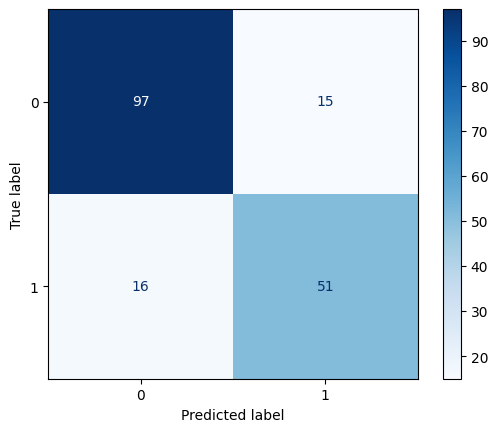

In [ ]:
best_index = nn_best_results_data["f1_score"].idxmax()
best_nn_model = best_nn_model  # Utiliza el modelo del mejor F1 score global
test_predicciones = best_nn_model.predict(oCleanTestData.drop(columns = ['Survived']))

fTestFScore = f1_score(oCleanTestData["Survived"], test_predicciones)
print("F1 Score:  ", fTestFScore)
print("Log Loss:  ", log_loss(oCleanTestData["Survived"], test_predicciones))
print("Precision: ", precision_score(oCleanTestData["Survived"], test_predicciones))

cm = confusion_matrix(oCleanTestData["Survived"], test_predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_model.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.show()

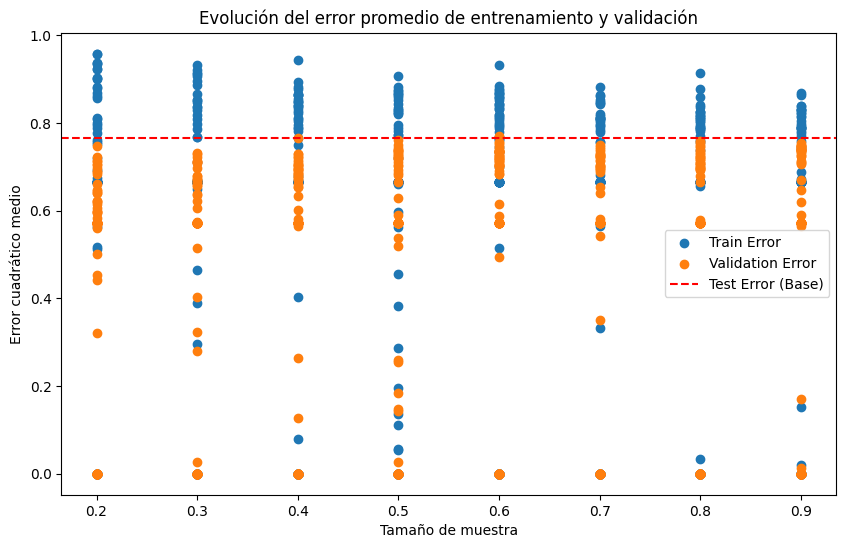

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(nn_model_data["train_size"] , nn_model_data["fTrainingFScore"], label='Train Error')
plt.scatter(nn_model_data["train_size"]  , nn_model_data["fValidationFScore"], label='Validation Error')
plt.axhline(y=fTestFScore, color='red', linestyle='--', label='Test Error (Base)')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del error promedio de entrenamiento y validación')
plt.legend()
plt.show()

In [ ]:
nn_model_data = nn_model_data.sort_values(by = "fValidationFScore", ascending = False)
nn_model_data.head()

,layers,train_size,solver,fTrainingFScore,fTrainingLogLoss,fValidationFScore,fValidationLogLoss
590,"(6, 2, 2, 1)",0.6,lbfgs,0.842912,5.277821,0.770992,6.074773
534,"(5, 4, 2, 1)",0.4,adam,0.848485,5.119837,0.766917,6.277265
563,"(5, 4, 3, 1)",0.5,lbfgs,0.906667,3.290942,0.762264,6.378512
642,"(6, 3, 2, 1)",0.8,adam,0.809249,6.644919,0.758364,6.581004
690,"(6, 4, 2, 1)",0.8,adam,0.835655,5.907154,0.757895,6.985989


In [ ]:
nn_best_results_data = nn_best_results_data.sort_values(by = "f1_score", ascending = False)
nn_best_results_data.head()

,layers,train_size,solver,precision,f1_score,log_loss
10,"(6, 2, 2, 1)",0.6,lbfgs,0.848739,0.770992,6.074773
9,"(5, 4, 2, 1)",0.4,adam,0.829268,0.766917,6.277265
8,"(3, 4, 3, 1)",0.6,adam,0.773723,0.757143,6.884743
7,"(2, 3, 2, 1)",0.6,adam,0.766423,0.750000,7.087235
6,"(2, 2, 2, 1)",0.9,lbfgs,0.766917,0.739130,7.289728


In [ ]:
oTestData = pd.read_csv('/content/test.csv')

oSubmissionTestData = clean_data(oTestData)
best_index = nn_best_results_data["f1_score"].idxmax()
best_nn_model = best_nn_model  # Utiliza el modelo del mejor F1 score global
test_predicciones = best_nn_model.predict(oSubmissionTestData)

# Crear el archivo de salida con las predicciones
submit_data = pd.DataFrame(oTestData, columns=["PassengerId"])
submit_data["Survived"] = test_predicciones
submit_data.to_csv("prediction_nn.csv", index=False)
print("Predicciones guardadas en 'prediction.csv'")

Predicciones guardadas en 'prediction.csv'


# Modelo Arbol de Decisión

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, log_loss, precision_score

# Inicialización
oFScore = []
train_sizes = np.arange(0.2, 1.0, 0.1)  # 20% a 90%, incrementando de 10 en 10

best_results = []
best_model = None
best_max_depth = None
best_min_samples_leaf = None
max_depth_list = [3, 4, 5, 6, 7]  # Profundidades máximas del árbol
min_samples_leaf_list = [1, 2, 4]  # Número mínimo de muestras en una hoja
results = []

# Ciclo para probar diferentes hiperparámetros
for max_depth in max_depth_list:
    for min_samples_leaf in min_samples_leaf_list:
        for train_size in train_sizes:
            best_seed, best_score, best_precision = None, float("-inf"), float("-inf")
            best_score = 0

            # Generar 100 semillas aleatorias
            seeds = [[np.random.randint(0, 2**32 - 1), np.random.randint(0, 2**32 - 1)] for _ in range(100)]
            for seed in seeds:
                # Tamaño del sample
                iSampleSize = int(len(oCleanTrainData) * train_size)
                oTrainSubset = oCleanTrainData.sample(n=iSampleSize)

                # Oversampling para balancear las clases
                x, y = oversample(oTrainSubset[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]], oTrainSubset["Survived"])

                # Entrenamiento del modelo utilizando DecisionTreeClassifier
                oModelTemp = DecisionTreeClassifier(random_state=seed[1], max_depth=max_depth, min_samples_leaf=min_samples_leaf)
                oModelTemp.fit(x, y)

                # Predicciones en el conjunto de entrenamiento
                oTrainingPredict = oModelTemp.predict(x)
                fTrainingFScore = f1_score(y, oTrainingPredict)
                fTrainingLogLoss = log_loss(y, oTrainingPredict)

                # Predicciones en el conjunto de validación
                oValidationPredict = oModelTemp.predict(oCleanValidationData[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]])
                fValidationFScore = f1_score(oCleanValidationData["Survived"], oValidationPredict)
                fValidationLogLoss = log_loss(oCleanValidationData["Survived"], oValidationPredict)

                # Almacenar el F-score de validación
                oFScore.append(fValidationFScore)

                # Actualizar el mejor modelo
                if fValidationFScore > best_score:
                    best_score = fValidationFScore
                    best_seed = seed
                    best_precision = precision_score(oCleanValidationData["Survived"], oValidationPredict)
                    best_model = oModelTemp
                    best_max_depth = max_depth
                    best_min_samples_leaf = min_samples_leaf
                    best_results.append({
                        "train_size": train_size,
                        "best_seed_split": best_seed[0],
                        "best_seed_train": best_seed[1],
                        "best_precision": best_precision,
                        "best_score": best_score,
                        "best_max_depth": best_max_depth,
                        "best_min_samples_leaf": best_min_samples_leaf,
                        "best_model": best_model,
                    })

                # Almacenar todos los resultados
                results.append((train_size, max_depth, min_samples_leaf, fTrainingFScore, fTrainingLogLoss, fValidationFScore, fValidationLogLoss))

# Convertir resultados a DataFrame y exportar a CSV
decision_tree_data = pd.DataFrame(results, columns=["train_size", "max_depth", "min_samples_leaf", "fTrainingFScore", "fTrainingLogLoss", "fValidationFScore", "fValidationLogLoss"])
best_results_df = pd.DataFrame(best_results)
best_results_df.to_csv("best_tree_results.csv", index=False)

# Mostrar los mejores resultados
print(best_results_df)


     train_size  best_seed_split  best_seed_train  best_precision  best_score  \
0           0.2        334490763       3583404569        0.685484    0.646388   
1           0.2       1686234542       4089353493        0.641176    0.705502   
2           0.2        871169497       3583018481        0.713287    0.723404   
3           0.2       2152480510        934373311        0.668539    0.750789   
4           0.3       2465790219       3738454476        0.692308    0.669145   
..          ...              ...              ...             ...         ...   
630         0.8       3198213124       1754648932        0.775194    0.746269   
631         0.9       3887606473        468304133        0.775862    0.705882   
632         0.9       2122526050       2637109213        0.757812    0.726592   
633         0.9       1465539036        372016571        0.755556    0.744526   
634         0.9        728753105       3385472702        0.770992    0.748148   

     best_max_depth  best_m

F1 Score:   0.7785234899328859
Log Loss:   6.6449193398931055
Precision:  0.7631578947368421


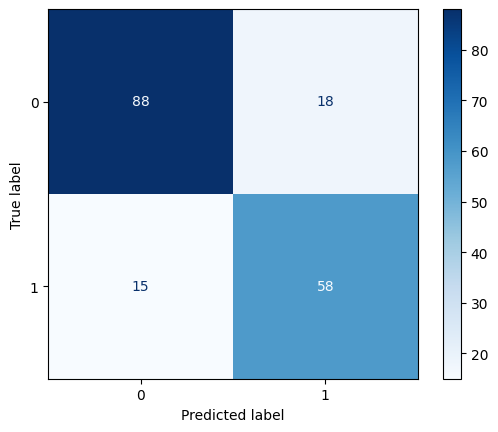

In [ ]:
# Evaluar el mejor modelo en el conjunto de prueba
best_index = best_results_df["best_score"].idxmax()
best_model = best_results_df.iloc[best_index]["best_model"]

test_predicciones = best_model.predict(oCleanTestData[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]])

fTestFScore = f1_score(oCleanTestData["Survived"], test_predicciones)
print("F1 Score:  ", fTestFScore)
print("Log Loss:  ", log_loss(oCleanTestData["Survived"], test_predicciones))
print("Precision: ", precision_score(oCleanTestData["Survived"], test_predicciones))

cm = confusion_matrix(oCleanTestData["Survived"], test_predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

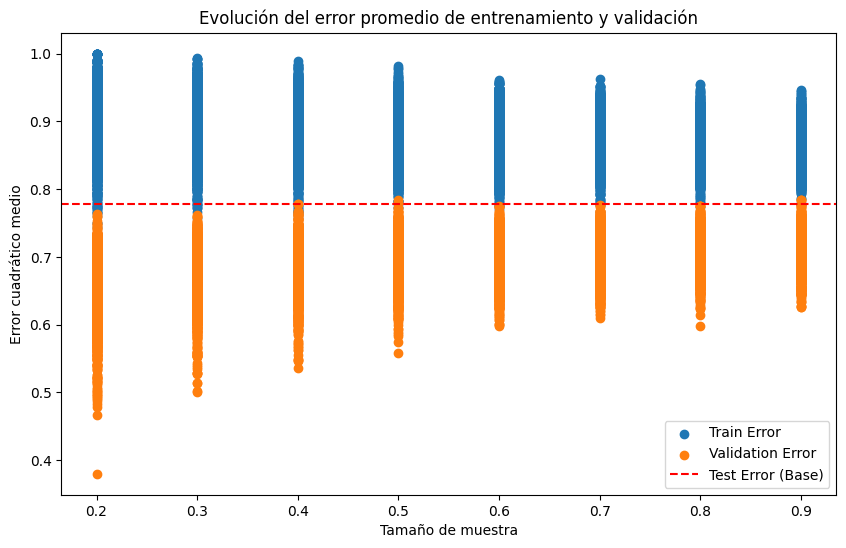

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(decision_tree_data["train_size"] , decision_tree_data["fTrainingFScore"], label='Train Error')
plt.scatter(decision_tree_data["train_size"]  , decision_tree_data["fValidationFScore"], label='Validation Error')
plt.axhline(y=fTestFScore, color='red', linestyle='--', label='Test Error (Base)')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del error promedio de entrenamiento y validación')
plt.legend()
plt.show()

In [ ]:
decision_tree_data = decision_tree_data.sort_values(by = "fValidationFScore", ascending = True)
decision_tree_data.head()

,train_size,max_depth,min_samples_leaf,fTrainingFScore,fTrainingLogLoss,fValidationFScore,fValidationLogLoss
6483,0.2,5,4,0.886364,3.834431,0.379888,11.238330
6494,0.2,5,4,0.888889,3.887061,0.466368,12.048300
2488,0.2,4,1,0.912621,3.243929,0.478431,13.465747
4005,0.2,4,4,0.839506,4.984761,0.483412,11.035838
8061,0.2,6,2,0.919540,2.867109,0.486692,13.668239


In [ ]:
best_results_df = best_results_df.sort_values(by="best_score", ascending=False)
best_results_df.head()


,train_size,best_seed_split,best_seed_train,best_precision,best_score,best_max_depth,best_min_samples_leaf,best_model
141,0.5,124441603,1850611572,0.770833,0.784452,4,1,"DecisionTreeClassifier(max_depth=4, random_sta..."
201,0.9,3025508625,3843109387,0.770833,0.784452,4,2,"DecisionTreeClassifier(max_depth=4, min_sample..."
241,0.9,1560008029,3270805070,0.738854,0.783784,4,4,"DecisionTreeClassifier(max_depth=4, min_sample..."
221,0.5,3837535486,2002760892,0.824000,0.780303,4,4,"DecisionTreeClassifier(max_depth=4, min_sample..."
183,0.5,792563679,332139667,0.824000,0.780303,4,2,"DecisionTreeClassifier(max_depth=4, min_sample..."


In [ ]:
# Cargar los datos de prueba
oTestData = pd.read_csv('/content/test.csv')

# Limpiar los datos de prueba utilizando la función clean_data
oSubmissionTestData = clean_data(oTestData)

# Encontrar el mejor índice del modelo basado en el mejor F1 score
best_index = best_results_df["best_score"].idxmax()
best_model = best_results_df.iloc[best_index]["best_model"]  # Recuperar el mejor modelo

# Realizar predicciones en los datos de prueba
test_predicciones = best_model.predict(oSubmissionTestData[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]])

# Crear el archivo de salida con las predicciones
submit_data = pd.DataFrame(oTestData["PassengerId"])
submit_data["Survived"] = test_predicciones
submit_data.to_csv("predictionAD.csv", index=False)

print("Predicciones guardadas en 'prediction.csv'")


Predicciones guardadas en 'prediction.csv'


# Modelo Bosque Aleatorio

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, log_loss, precision_score
import numpy as np
import pandas as pd

# Definir las combinaciones de hiperparámetros
n_estimators_list = [100, 150, 200, 250, 300]  # Número de árboles en el bosque
max_depth_list = [4, 5]  # Máxima profundidad del árbol
train_sizes = np.arange(0.2, 1.0, 0.1)  # Tamaños de entrenamiento del 20% al 90%

oFScore = []
results = []
best_results = []
best_model = None
best_params = None

# Iterar sobre los hiperparámetros
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for train_size in train_sizes:
            print(f'n_estimators: {n_estimators}, max_depth: {max_depth}, size: {train_size}')

            best_seed, best_score, best_precision = None, float("-inf"), float("-inf")
            best_score = 0

            # Generar 100 pares de semillas para reproducibilidad
            seeds = [[np.random.randint(0, 2**32 - 1), np.random.randint(0, 2**32 - 1)] for _ in range(100)]
            for seed in seeds:

                # Asignar el tamaño del sample con el que se va a entrenar
                iSampleSize = int(len(oCleanTrainData) * train_size)

                # Separar el subset de entrenamiento según el tamaño asignado
                oTrainSubset = oCleanTrainData.sample(n=iSampleSize)

                x, y = oversample(oTrainSubset[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]], oTrainSubset["Survived"])

                # Entrenar el modelo RandomForest con los hiperparámetros
                oModelTemp = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=seed[1])
                #oModelTemp.fit(oTrainSubset[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]], oTrainSubset["Survived"])
                oModelTemp.fit(x, y)

                # Generar predicciones con el modelo ya entrenado en el conjunto de entrenamiento
                oTrainingPredict = oModelTemp.predict(oTrainSubset[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]])
                fTrainingFScore = f1_score(oTrainSubset["Survived"], oTrainingPredict)
                fTrainingLogLoss = log_loss(oTrainSubset["Survived"], oTrainingPredict)

                # Generar predicciones con el modelo en el conjunto de validación
                oValidationPredict = oModelTemp.predict(oCleanValidationData[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]])
                fValidationFScore = f1_score(oCleanValidationData["Survived"], oValidationPredict)
                fValidationLogLoss = log_loss(oCleanValidationData["Survived"], oValidationPredict)

                # Guardar el F1-Score de validación
                oFScore.append(fValidationFScore)

                # Si el F1-Score de validación es mejor, guardar el mejor modelo y sus parámetros
                if fValidationFScore > best_score:
                    best_score = fValidationFScore
                    best_seed = seed
                    best_precision = precision_score(oCleanValidationData["Survived"], oValidationPredict)
                    best_model = oModelTemp  # Guardar el mejor modelo
                    best_params = {"n_estimators": n_estimators, "max_depth": max_depth}  # Guardar los mejores hiperparámetros
                    best_results.append({
                        "train_size": train_size,
                        "best_seed_split": best_seed[0],
                        "best_seed_train": best_seed[1],
                        "best_precision": best_precision,
                        "best_score": best_score,
                        "n_estimators": n_estimators,
                        "max_depth": max_depth,
                    })

                # Guardar todos los resultados
                results.append((train_size, n_estimators, max_depth, fTrainingFScore, fTrainingLogLoss, fValidationFScore, fValidationLogLoss))

# Convertir resultados a DataFrame y exportar a CSV
rf_data = pd.DataFrame(results, columns=["train_size", "n_estimators", "max_depth", "fTrainingFScore", "fTrainingLogLoss", "fValidationFScore", "fValidationLogLoss"])
best_results_df = pd.DataFrame(best_results)
best_results_df.to_csv("best_rf_results.csv", index=False)

# Mostrar los mejores resultados
print(best_results_df)


n_estimators: 100, max_depth: 4, size: 0.2
n_estimators: 100, max_depth: 4, size: 0.30000000000000004
n_estimators: 100, max_depth: 4, size: 0.4000000000000001
n_estimators: 100, max_depth: 4, size: 0.5000000000000001
n_estimators: 100, max_depth: 4, size: 0.6000000000000001
n_estimators: 100, max_depth: 4, size: 0.7000000000000002
n_estimators: 100, max_depth: 4, size: 0.8000000000000003
n_estimators: 100, max_depth: 4, size: 0.9000000000000001
n_estimators: 100, max_depth: 5, size: 0.2
n_estimators: 100, max_depth: 5, size: 0.30000000000000004
n_estimators: 100, max_depth: 5, size: 0.4000000000000001
n_estimators: 100, max_depth: 5, size: 0.5000000000000001
n_estimators: 100, max_depth: 5, size: 0.6000000000000001
n_estimators: 100, max_depth: 5, size: 0.7000000000000002
n_estimators: 100, max_depth: 5, size: 0.8000000000000003
n_estimators: 100, max_depth: 5, size: 0.9000000000000001
n_estimators: 150, max_depth: 4, size: 0.2
n_estimators: 150, max_depth: 4, size: 0.3000000000000000

F1 Score:   0.6614173228346456
Log Loss:   8.658531261072836
Precision:  0.6885245901639344


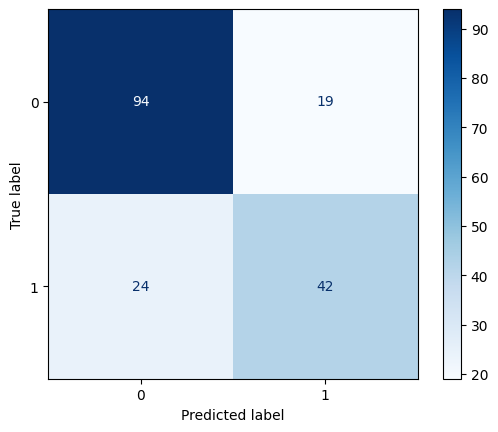

In [ ]:
# Obtener el índice del mejor resultado (basado en el F1 Score más alto)
best_index = best_results_df["best_score"].idxmax()

# Utilizar el mejor modelo almacenado en 'best_model' para predecir en los datos de prueba
test_predicciones = best_model.predict(oCleanTestData[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]])

# Calcular las métricas de evaluación en los datos de prueba
fTestFScore = f1_score(oCleanTestData["Survived"], test_predicciones)
fTestLogLoss = log_loss(oCleanTestData["Survived"], test_predicciones)
fTestPrecision = precision_score(oCleanTestData["Survived"], test_predicciones)

# Mostrar las métricas de evaluación
print("F1 Score:  ", fTestFScore)
print("Log Loss:  ", fTestLogLoss)
print("Precision: ", fTestPrecision)

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(oCleanTestData["Survived"], test_predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


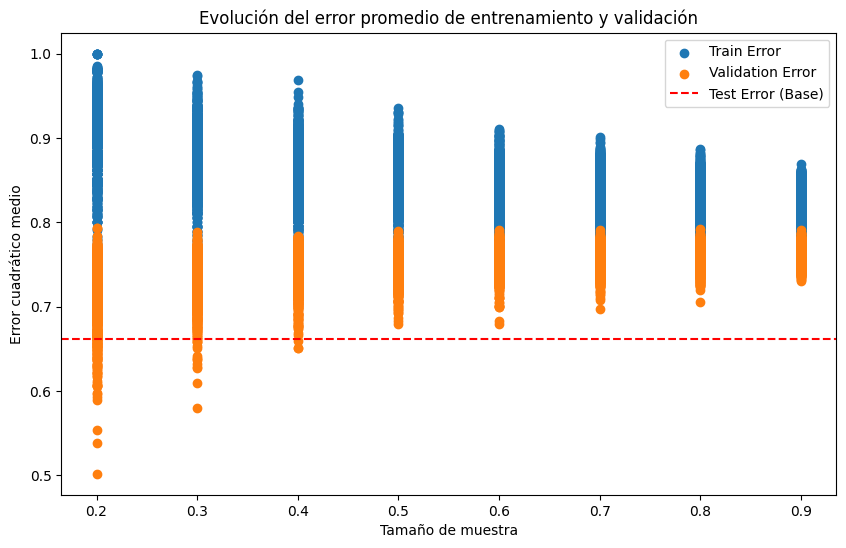

In [ ]:
  plt.figure(figsize=(10, 6))
plt.scatter(rf_data["train_size"] , rf_data["fTrainingFScore"], label='Train Error')
plt.scatter(rf_data["train_size"]  , rf_data["fValidationFScore"], label='Validation Error')
plt.axhline(y=fTestFScore, color='red', linestyle='--', label='Test Error (Base)')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del error promedio de entrenamiento y validación')
plt.legend()
plt.show()

In [ ]:
rf_data = rf_data.sort_values(by = "fValidationFScore", ascending = True)
rf_data.head()

,train_size,n_estimators,max_depth,fTrainingFScore,fTrainingLogLoss,fValidationFScore,fValidationLogLoss
5602,0.2,250,5,0.888889,3.045943,0.502092,12.048300
29,0.2,100,4,0.742857,4.568914,0.538117,10.428360
5685,0.2,250,5,0.867925,3.553600,0.553571,10.124622
7357,0.3,300,5,0.840580,3.740379,0.579926,11.440823
0,0.2,100,4,0.818182,4.061257,0.589744,9.719637


In [ ]:
best_results_df = best_results_df.sort_values(by = "best_score", ascending = True)
best_results_df.head()

,train_size,best_seed_split,best_seed_train,best_precision,best_score,best_max_depth,best_min_samples_leaf,best_model
159,0.2,1119926316,1047122078,0.719101,0.561404,4,2,"DecisionTreeClassifier(max_depth=4, min_sample..."
425,0.2,343772006,243201809,0.693878,0.573840,6,2,"DecisionTreeClassifier(max_depth=6, min_sample..."
333,0.2,3540181433,1634887774,0.701031,0.576271,5,4,"DecisionTreeClassifier(max_depth=5, min_sample..."
287,0.2,2161652909,4212499901,0.755814,0.577778,5,2,"DecisionTreeClassifier(max_depth=5, min_sample..."
242,0.2,428893739,2106457437,0.666667,0.600791,5,1,"DecisionTreeClassifier(max_depth=5, random_sta..."


In [ ]:
import pandas as pd

# Leer el archivo de datos de prueba
oTestData = pd.read_csv('/content/test.csv')

# Limpiar los datos de prueba utilizando la función de limpieza que ya has definido
oSubmissionTestData = clean_data(oTestData)

# Utilizar el modelo del mejor F1 score global
best_index = best_results_df["best_score"].idxmax()
best_model = best_model  # El modelo con el mejor F1 score global

# Hacer predicciones con el mejor modelo
test_predicciones = best_model.predict(oSubmissionTestData[["Age", "Pclass", "Sex", "SibSp", "Parch", "C", "Q", "S"]])

# Crear el archivo de salida con las predicciones
submit_data = pd.DataFrame({
    "PassengerId": oTestData["PassengerId"],
    "Survived": test_predicciones
})
submit_data.to_csv("predictionRF.csv", index=False)

print("Predicciones guardadas en 'prediction.csv'")


Predicciones guardadas en 'prediction.csv'
